In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rc
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from statsmodels.tsa.stattools import ccf
%matplotlib notebook

In [2]:
path = './Susceptibilities/'

suscepC = np.load(path+'suscepC.npy')
NC = np.load(path+'NC.npy')


suscepA = np.load(path+'suscepA.npy')
NA = np.load(path+'NA.npy')

omega = np.load(path+'omega.npy')
parameters = pd.read_csv(path+'parameters.txt',index_col=0)


path = './RespFunctions/'

respC = np.load(path+'respC.npy')
respA = np.load(path+'respA.npy')

time = np.load(path+'time.npy')

In [3]:
parameters

,sigmaC,sigmaA,theta,eps,h0,sim6,sim12,sim24,sim48
0,1,1.4,2.0,0.02,2,262200,91900,120250,55750


In [4]:
h0 = parameters.loc[0,'h0']
sigmaC = parameters.loc[0,'sigmaC']
DC = sigmaC**2/2
omega0 = np.sqrt(h0**2-DC**2)
residue = - 1/(4*omega0)*(DC - 1j*omega0)
print( np.real(residue) , np.imag(residue) )

-0.06454972243679027 0.24999999999999997


In [5]:
GcR = [np.real(suscepC[i,:]) for i in range(suscepC.shape[0])]
GcI = [np.imag(suscepC[i,:]) for i in range(suscepC.shape[0])]

GaR = [np.real(suscepA[i,:]) for i in range(suscepA.shape[0])]
GaI = [np.imag(suscepA[i,:]) for i in range(suscepA.shape[0])]

<IPython.core.display.Javascript object>


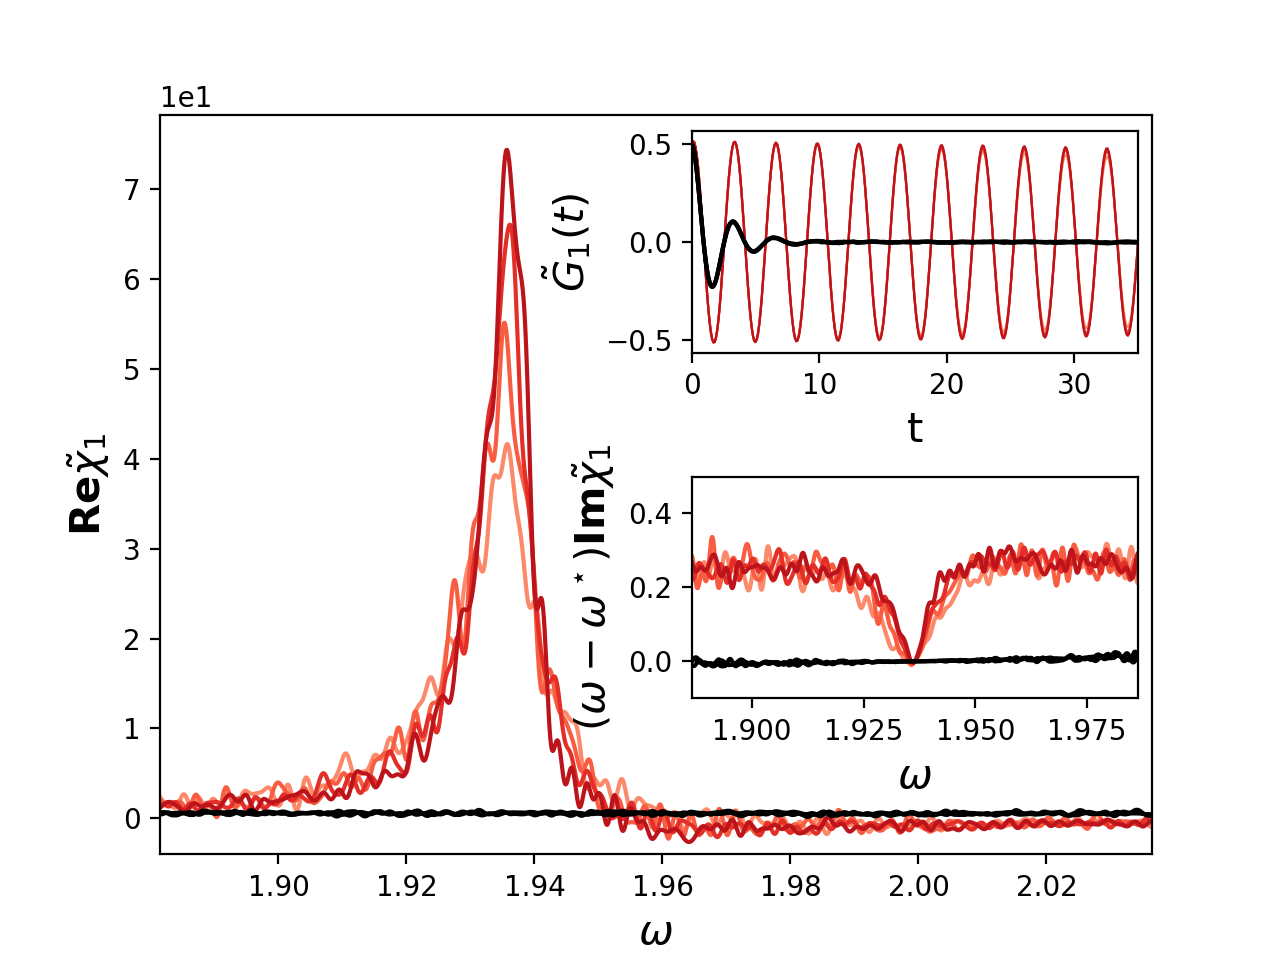

In [6]:
reds = cm.get_cmap('Reds')
colors = reds(np.linspace(0.4,0.8,len(GcR)))

plt.figure()
for i in range(len(GcR)):
    plt.plot(omega,GcR[i],color=colors[i])
    
for i in range(len(GaR)):
    plt.plot(omega,GaR[i],'k')
plt.xlabel('$\omega$',size=15)
plt.ylabel('$\\mathbf{Re} \\tilde{\chi}_1$',size=15)
plt.xlim(omega0-0.055,omega0+0.1)
plt.ylim(-4)
#plt.vlines(omega0,0,1,linestyle='--',color='k',linewidth=1.5)

ax = plt.gca()
ax.set_xscale('linear')

ax.ticklabel_format(axis='y',style='sci',scilimits=(0,0))

axin = inset_axes(ax, width="100%", height="100%",
                   bbox_to_anchor=(0.55,0.66,0.45,0.3),
                   bbox_transform=ax.transAxes, loc=4)

    
    
for i in range(respC.shape[0]):
    axin.plot(time,respC[i,:],color=colors[i],linewidth=0.8)
    
for i in range(respA.shape[0]):
    axin.plot(time,respA[i,:],color='k')
axin.set_xlabel('t',size=15)
axin.set_ylabel('$\\tilde{G}_1(t)$',size=15)
axin.set_xlim(0,35)


axin = inset_axes(ax, width="100%", height="100%",
                   bbox_to_anchor=(0.55,0.23,0.45,0.3),
                   bbox_transform=ax.transAxes)

for i in range(len(GcI)):
    axin.plot(omega,(omega-omega0)*GcI[i],color=colors[i])
    
for i in range(len(GaI)):
    axin.plot(omega,(omega-omega0)*GaI[i],color='k')
    
#axin.vlines(omega0,0,0.5,color='k',linestyle='--',linewidth=1.5)
#axin.hlines(np.imag(residue),omega0-0.05,omega0+0.05,linestyle='--',linewidth=1.5)
axin.set_xlim(omega0-0.05,omega0+0.05)
axin.set_ylim(-0.1,0.5)
axin.set_xlabel('$\omega$',size=15)
axin.set_ylabel('$ \\left( \omega - \omega^\star \\right) \\mathbf{Im}\\tilde{\chi}_1 $',size=15);
#plt.savefig('Kuramoto_BimodalDistribution.jpeg',dpi=1200)

# Check the residue

### Analytical Results

In [7]:
theta = 4*DC

Den = lambda omega : (omega**2 - (DC**2 + h0**2))**2 + 4*omega**2 *DC**2

Cr = lambda omega : (DC**2+h0**2)/DC *(omega**2+DC**2-h0**2)/Den(omega)
Ci = lambda omega : omega* (omega**2+DC**2-3*h0**2)/Den(omega)

C = lambda omega : (Cr(omega)+1j*Ci(omega))/2

P = lambda omega : 1 - theta*DC/2/(h0**2+DC**2)*(1+2*1j*omega*C(omega))

#### Checking that the conditions on the matrix P are valid 

condI = DC*theta/2/(h0**2+DC**2)*(1-omega0*Ci(omega0)) 
condR = Cr(omega0)
print(condR,condI)

0.0 1.0


<IPython.core.display.Javascript object>


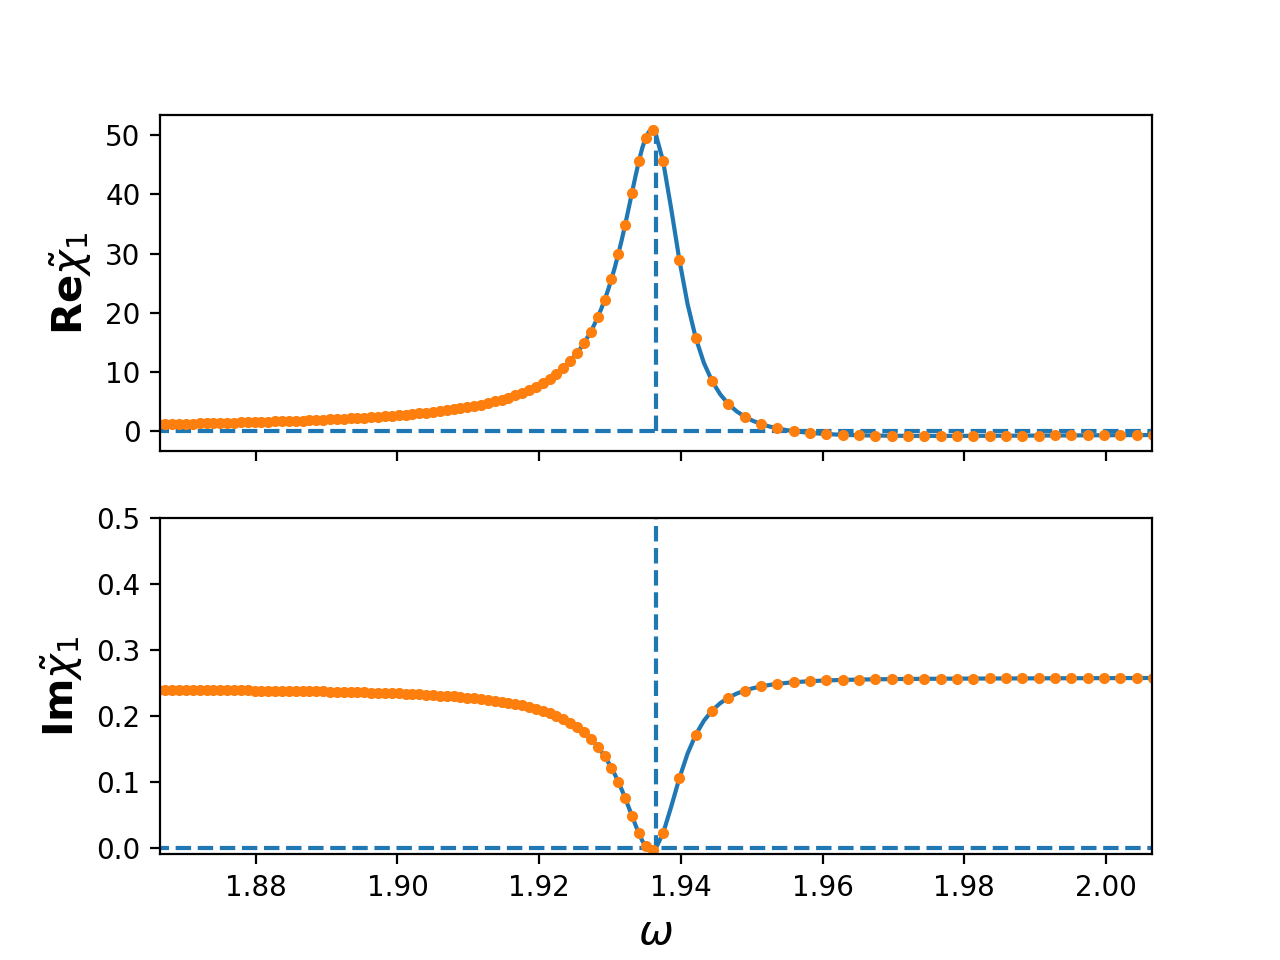

(-0.01, 0.5)

In [8]:
susce = lambda omega : 1/theta * (1-P(omega))/P(omega)


xl = np.linspace(0,omega0,4000)
xr = np.linspace(omega0+0.001,10,7000)
X = np.concatenate((xl,xr))


eps = 0.005

fig, ax = plt.subplots(2,1,sharex=True)
ax[0].plot(X,np.real(susce(X+1j*eps)))

ax[0].set_xlim(omega0-0.05,omega0+0.05)
ax[0].vlines(omega0,0,max(np.real(susce(X+1j*eps))),linestyle='--')
ax[0].hlines(0,0,10,linestyle='--')

ax[0].set_ylabel('$\\mathbf{Re}\\tilde{\chi}_1$',size=15)



ax[1].plot(X,(X-omega0)*np.imag(susce(X+1j*eps)))

ax[1].set_xlim(omega0-0.07,omega0+0.07)
ax[1].set_xlabel('$\omega$',size=15)
ax[1].set_ylabel('$\\mathbf{Im}\\tilde{\chi}_1$',size=15)


ax[1].hlines(0,0,5,linestyle='--')

ymin = min(np.imag(susce(X+1j*eps)))
ymax = max(np.imag(susce(X+1j*eps)))
ax[1].vlines(omega0,ymin,ymax,linestyle='--') 

residue = - DC/(4*omega0) + 1j/4
prova = lambda omega : residue / (omega-omega0) - np.conj(residue)/(omega+omega0)

vis = 2
ax[0].plot(X[::vis],np.real(prova(X+1j*eps))[::vis],linestyle = 'None',marker='o',markersize=3)
ax[1].plot(X[::vis],(X-omega0)[::vis]*np.imag(prova(X+1j*eps))[::vis],linestyle='None',marker='o',markersize=3)
#plt.savefig('FinalPlotsCane/Analytical.jpeg',dpi=1200)
ax[1].set_ylim(-0.01,0.5)

#### Check the asymptotic behaviours: we expect the imaginary part to fall as 1/omega and the real part as 1/omega^2

<IPython.core.display.Javascript object>


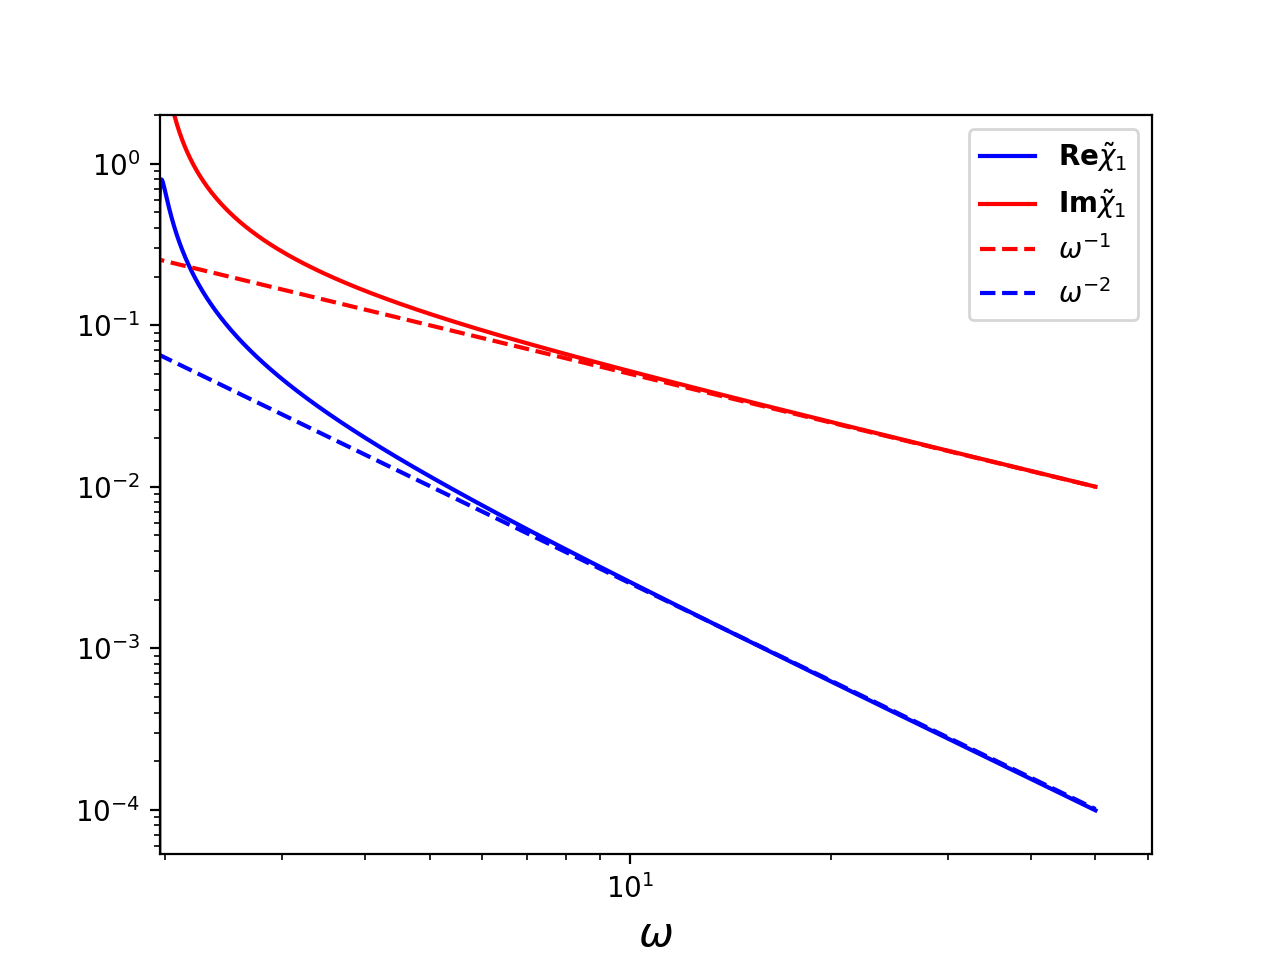

/var/folders/w9/0bx3w08d6ns6yby62d2zqlmh0000gn/T/ipykernel_1078/2755820508.py:8: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(-0.01,2)


In [9]:
X = np.linspace(1,50,8000)
plt.figure()
s = susce(X+1j*eps)#prova(X+1j*eps)
plt.loglog(X,-np.real(s),'b', label = '$\mathbf{Re}\\tilde{\chi}_1$')
plt.loglog(X,np.imag(s),'r', label = '$\mathbf{Im}\\tilde{\chi}_1$')

plt.xlim(omega0+0.03)
plt.ylim(-0.01,2)

A1 = 2*np.imag(residue)
p1 = lambda x : A1*x**(-1)

A2 = 2* ( np.real(residue)*omega0 - np.imag(residue)*eps)
p2 = lambda x : np.abs(A2)*x**(-2)


plt.loglog(X,p1(X),'r--',label = '$\omega^{-1}$')
plt.loglog(X,p2(X),'b--',label = '$\omega^{-2}$')

plt.xlabel('$\omega$',size=15)
plt.legend()
#plt.savefig('asymptotic_behaviour.jpeg',dpi=1200)

### Evaluating Response to Sinusoidal Forcing
In the thermodynamic limit $N \to \infty$ the response to a sinusoidal forcing at frequency $\omega$ is 
\begin{equation}
\langle \langle A_1 \rangle \rangle(t) = - \mathbf{Im}\left(e^{-i \omega t} \tilde{\chi_1}\left(\omega \right)\right) = - \mathbf{Im}\tilde{\chi_1}(\omega) \cos(\omega t) +  \mathbf{Re}\tilde{\chi_1}(\omega) \sin(\omega t)
\end{equation}
At the critical frequency, the susceptibility is given at leading order by 
\begin{equation}
\tilde{\chi_1}(\omega_0) = \frac{\kappa}{i \gamma_N} = \frac{1}{\gamma_N}\left(\kappa_I - i \kappa_R \right)
\end{equation}
If the residue is completely imaginary $\kappa_R = 0$ the response is in phase with the forcing.

In the Kuramoto model with bimodal frequency distribution, the residue has a real part and the response can be written as
\begin{equation}
\langle \langle A_1 \rangle \rangle(t) = \frac{|\kappa|^2}{\gamma_N} \sin\left(\omega_0 t + \phi' \right)
\end{equation}
where the phase shift is $\phi' = \phi - \frac{\pi}{2}$ and $\phi$ is related to the ratio of the imaginary and real part of the residue as 
\begin{equation}
\phi = \arctan\left(- \frac{\kappa_I}{\kappa_R} \right) = \arctan\left(\frac{\omega_0}{D} \right)  \approx 1.32
\end{equation}
So that the phase shift is negative and equals to $\phi' \approx  - 0.25$.

#### Theoretical and Analytical results

<IPython.core.display.Javascript object>


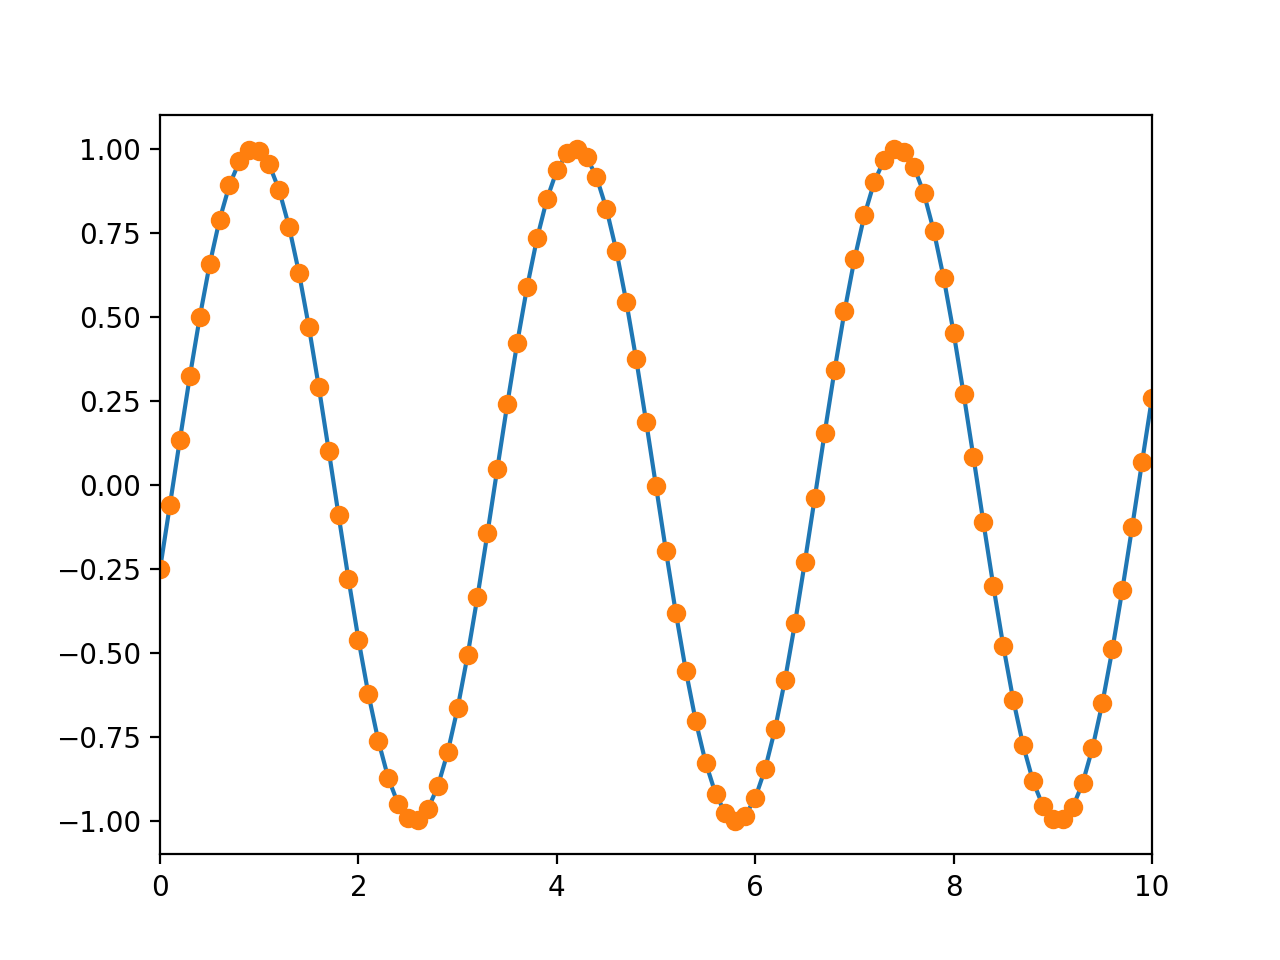

(0.0, 10.0)

In [10]:
phi = np.arctan(omega0/DC)

A = lambda t : -np.imag( np.exp(-1j*omega0*t)*susce(omega0+1j*eps) )
A1 = lambda t : np.sin(omega0*t + phi - np.pi/2)
plt.figure()
plt.plot(time,A(time)/max(A(time)))
plt.plot(time,A1(time),'o')

plt.xlim(0,10)

#### Evaluating the response as a convolution with the Numerical Green Function 

In [11]:
from scipy.integrate import simps

In [12]:
Cforce = lambda x : np.sin(omega0*x)
rC = [ np.array( [simps(g*Cforce(t-time),time) for t in time] ) for g in respC[-1:] ] 

KeyboardInterrupt: 

In [ ]:
#rNC = [ np.array( [simps(g*Cforce(t-time),time) for t in time] ) for g in respA ] 

<IPython.core.display.Javascript object>


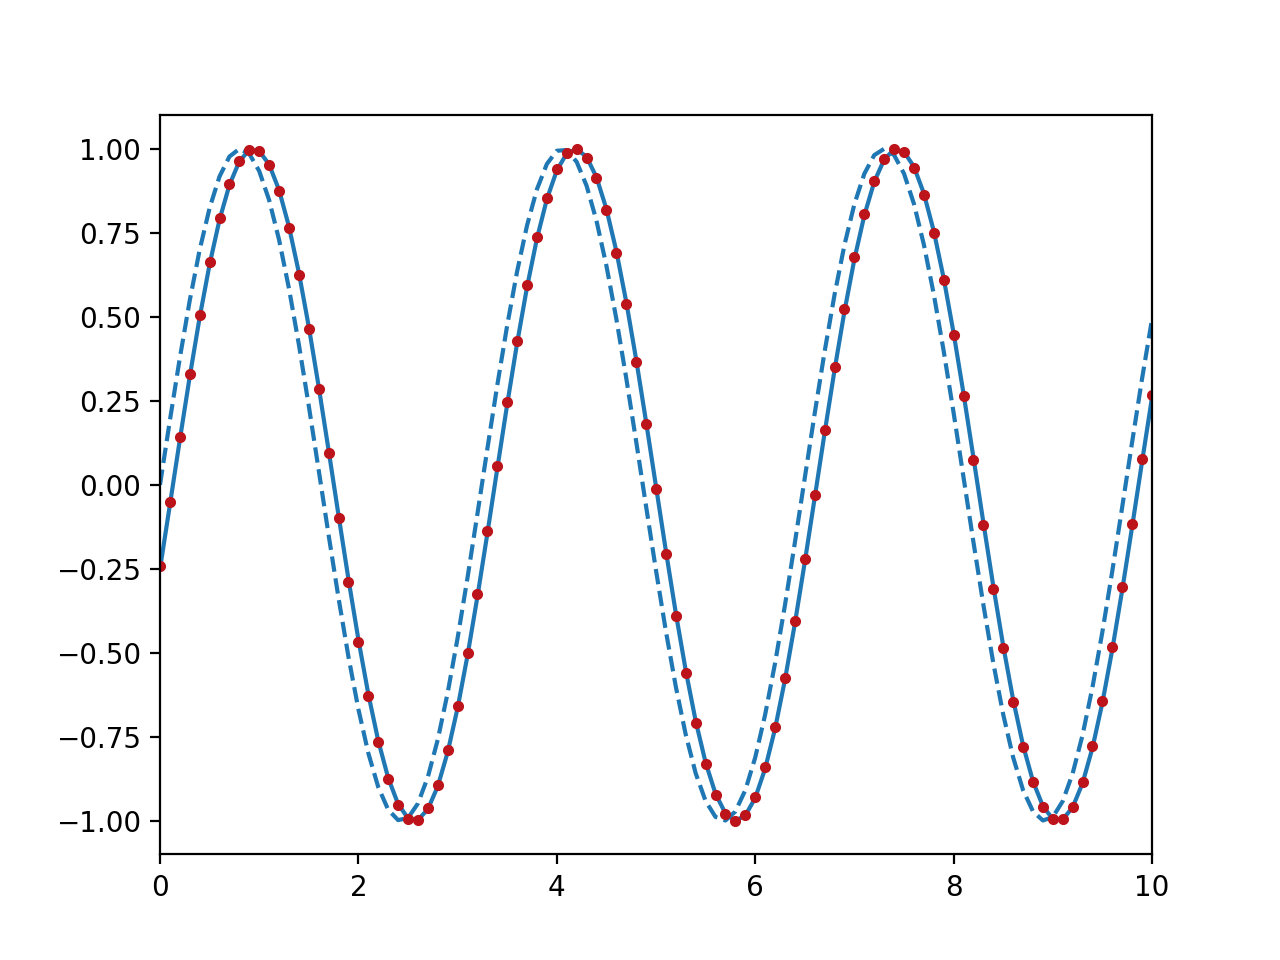

(0.0, 10.0)

In [14]:
plt.figure()

plt.plot(time,A1(time),color='#1f77b4')
plt.plot(time,Cforce(time),linestyle='--',color='#1f77b4')
plt.plot(time,rC[-1]/max(rC[-1]),color=colors[-1],linestyle='None',marker='o',markersize=3)

plt.xlim(0,10)

In [15]:
phase = phi - np.pi/2
a = ccf(Cforce(time),rC[-1])
angle = omega0*time

<IPython.core.display.Javascript object>


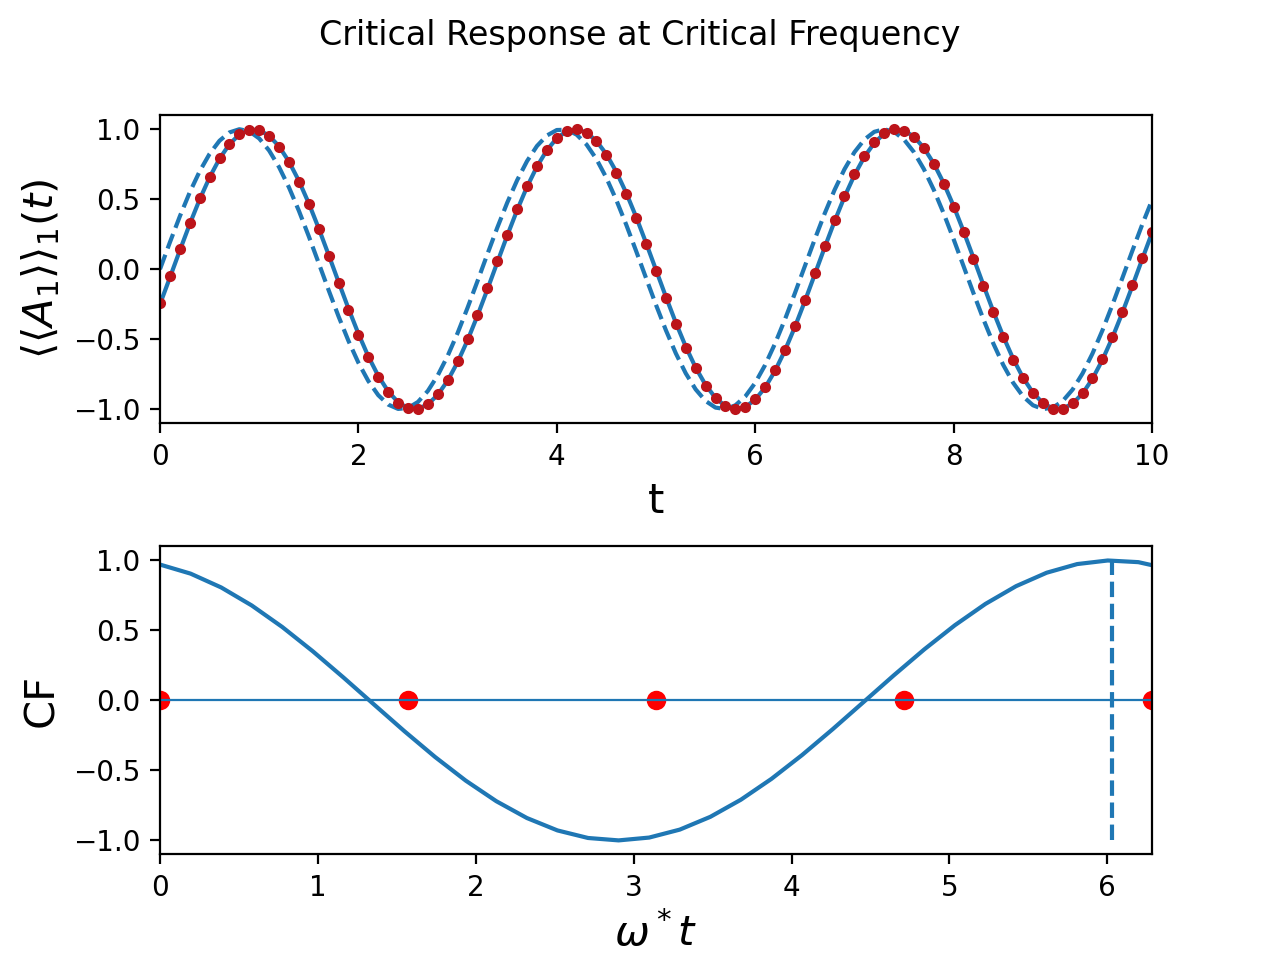

In [18]:
fig, ax = plt.subplots(2,1)
ax[0].plot(time,A1(time),color='#1f77b4')
ax[0].plot(time,Cforce(time),linestyle='--',color='#1f77b4')
ax[0].plot(time,rC[-1]/max(rC[-1]),color=colors[-1],linestyle='None',marker='o',markersize=3)

ax[0].set_xlim(0,10)

plt.subplots_adjust(hspace=0.4)
ax[0].set_xlabel('t',size=15)


ax[1].plot(angle,a)
ax[1].set_xlim(0,2*np.pi)
ax[1].set_xlabel('$\omega^* t$',size=15)
ax[1].set_ylabel('CF',size=15)
ax[1].hlines(0,0,2*np.pi,color='#1f77b4',linewidth=0.8)
ax[1].scatter(0,0,color='r')
ax[1].scatter(np.pi/2,0,color='r')
ax[1].scatter(np.pi,0,color='r')
ax[1].scatter(3*np.pi/2,0,color='r')
ax[1].scatter(2*np.pi,0,color='r')
ax[1].vlines(2*np.pi - abs(phase), -1,1, linestyle='--')

ax[0].set_ylabel('$\langle \langle A_1 \\rangle \\rangle_1(t)$',size=15)

fig.suptitle('Critical Response at Critical Frequency')
plt.savefig('FinalPlotsCane/CriticalPhaseShift.jpeg',dpi=1200)

In [18]:
omega1 = 2*omega0
forceOm1 = lambda x : np.sin(omega1*x)
rCOm1 = np.array( [simps(respC[-1]*forceOm1(t-time),time) for t in time] )

In [19]:
angle1 = omega1 * time
A1HighFrequency = lambda t : - np.cos(omega1*t)
aOm1 = ccf(forceOm1(time),rCOm1)

<IPython.core.display.Javascript object>


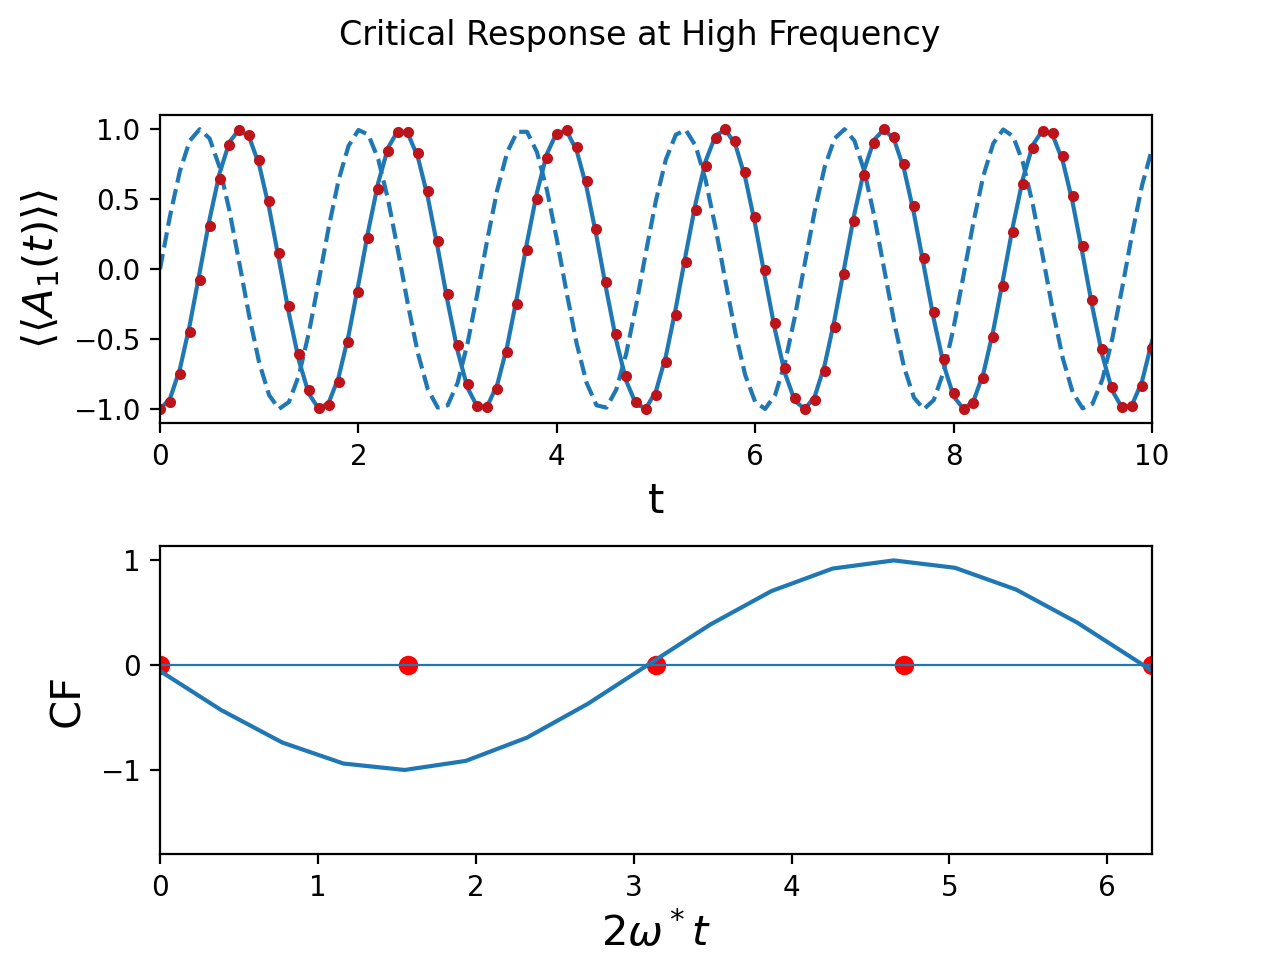

In [20]:
fig, ax = plt.subplots(2,1)
ax[0].plot(time,A1HighFrequency(time),color='#1f77b4')
ax[0].plot(time,forceOm1(time),linestyle='--',color='#1f77b4')
ax[0].plot(time,rCOm1/max(rCOm1),color=colors[-1],linestyle='None',marker='o',markersize=3)

ax[0].set_xlim(0,10)

plt.subplots_adjust(hspace=0.4)
ax[0].set_xlabel('t',size=15)


ax[1].plot(angle1,aOm1)
ax[1].set_xlim(0,2*np.pi)
ax[1].set_xlabel('$2 \omega^* t$',size=15)
ax[1].set_ylabel('CF',size=15)
ax[1].hlines(0,0,2*np.pi,color='#1f77b4',linewidth=0.8)
ax[1].scatter(0,0,color='r')
ax[1].scatter(np.pi/2,0,color='r')
ax[1].scatter(np.pi,0,color='r')
ax[1].scatter(3*np.pi/2,0,color='r')
ax[1].scatter(2*np.pi,0,color='r')
#ax[1].vlines(2*np.pi - abs(phase), -1,1, linestyle='--')

ax[0].set_ylabel('$\langle \langle A_1(t) \\rangle \\rangle$',size=15)
fig.suptitle('Critical Response at High Frequency')
plt.savefig('FinalPlotsCane/CriticalPhaseShiftHighFrequency.jpeg',dpi=1200)